<a href="https://colab.research.google.com/github/manoj-mathivanan/pythonML/blob/main/Manoj_Assignment17_Linear_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def LinearModelPrediction(x,w):
  yh = w[0] + w[1]*x
  return yh

def LogisticModelPrediction(x,w):
  yh = 1/(1+np.exp(-(w[0]+w[1]*x)))
  return yh

In [46]:
def LinearModelErrorCost(yh,y):
  m=len(y)
  error=yh-y
  return (1/(2*m))*np.sum(error**2)

def LogisticModelErrorCost(yh,y):
  m=len(y)
  error=y*np.log(yh)+(1-y)*np.log(1-yh)
  return (-1/m)*np.sum(error)

In [47]:
def gradient_descent(x,y,yh,w):
  m=len(y)
  error = yh -y
  w0_grad=(1/m)*np.sum(error)
  w1_grad=(1/m)*np.sum(error*x)
  return np.array([w0_grad,w1_grad])

In [78]:
def learn_feedback(initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, x, y):
  w = np.array(initial_guess)
  losses = []
  for i in range(num_iterations):
    yh = predictionmodel(x,w)
    #loss = predictionmodelcost(yh,y)
    #losses.append(loss)
    grad = gradient_descent(x,y,yh,w)
    w = w - learning_rate * grad
  return w,losses

<ipython-input-45-7eab06125de4>:2: RuntimeWarning: overflow encountered in multiply
  yh = w[0] + w[1]*x
<ipython-input-47-a3b4f62130ba>:5: RuntimeWarning: overflow encountered in multiply
  w1_grad=(1/m)*np.sum(error*x)
<ipython-input-78-78bd1a2b5dfa>:9: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * grad


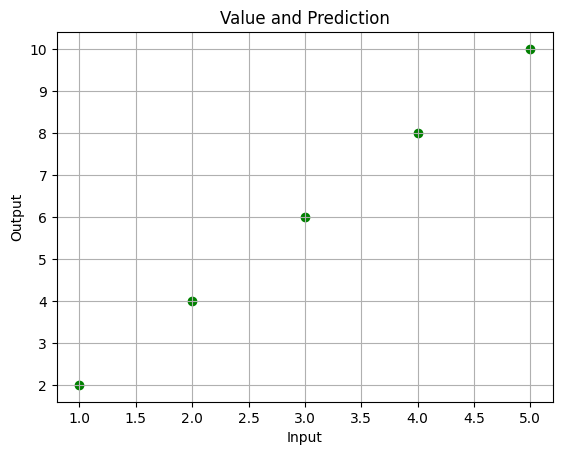

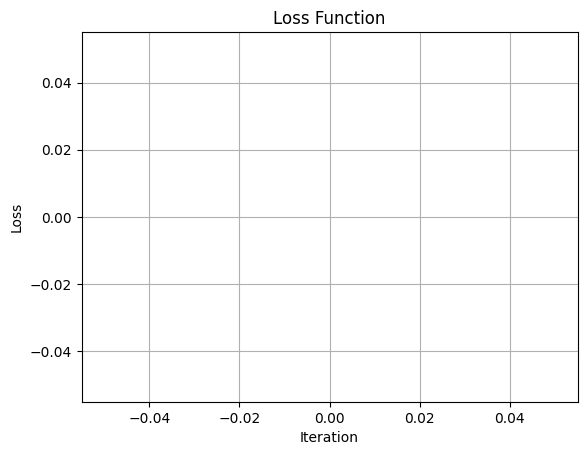

In [82]:
# Parameters
initial_guess = (10, -2)
learning_rate = 3
num_iterations = 1000
input = np.array([1, 2, 3, 4, 5])
output = np.array([2, 4, 6, 8, 10])
predictionmodel = LinearModelPrediction
predictionmodelcost = LinearModelErrorCost

# Running the code
final_position,losses = learn_feedback(initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, input, output)

#Plot the output
plt.scatter(input, output, color='green', label='Input',marker='o')
plt.plot(input, predictionmodel(input, final_position), color='red', label='Predicted',marker='o')
plt.title('Value and Prediction')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

plt.plot(losses, color='blue', label='Loss',marker='o')
plt.title('Loss Function')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()